# Pandas

Sometimes, we want to store 2 dimensional data and give a name to each column. Pandas allows us to do that and keep some of the `numpy` funcionality

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [3]:
X = np.random.normal(size=(100, 5))

In [4]:
X_pd = pd.DataFrame(X)
X_pd

,0,1,2,3,4
0,0.734111,-1.272442,-0.951315,-0.750375,0.964146
1,-1.251551,-0.399138,0.014774,1.832506,0.568253
2,0.150837,0.687964,0.808377,-0.744185,0.863320
3,-0.749892,-0.084228,-0.022408,0.810210,-0.060216
4,0.381221,-1.163499,-0.808031,0.083592,2.508684
...,...,...,...,...,...
95,-0.622465,-0.032610,1.905091,1.204273,-1.027141
96,-0.269858,1.212379,0.021702,-0.712369,0.703504
97,0.863467,0.429144,0.188198,0.743371,-0.266863
98,-0.683827,-0.591869,0.666907,0.219355,0.995572


Now, we have names for each of the rows and columns.

But it is more interesting to give meaninful names to the columns.

We can create `Series` (Pandas' vectors) and make them be columns

In [5]:
x_s = pd.Series([1, 2, 3, 4])
y_s = pd.Series([-1, -2, -3, -4])

In [6]:
x_s

0    1
1    2
2    3
3    4
dtype: int64

In [7]:
y_s

0   -1
1   -2
2   -3
3   -4
dtype: int64

In [8]:
XY = pd.DataFrame({'x': x_s, 'y': y_s})
XY

,x,y
0,1,-1
1,2,-2
2,3,-3
3,4,-4


Now we can access columns by name

In [9]:
XY['x']

0    1
1    2
2    3
3    4
Name: x, dtype: int64

In [ ]:
XY['x']

In [10]:
XY[['y', 'x']]

,y,x
0,-1,1
1,-2,2
2,-3,3
3,-4,4


In [11]:
2*XY

,x,y
0,2,-2
1,4,-4
2,6,-6
3,8,-8


We can also transpose:

In [12]:
XY.T

,0,1,2,3
x,1,2,3,4
y,-1,-2,-3,-4


Pandas' DataFrames make it easy to load data from multiple formats

In [13]:
?pd.DataFrame

Pandas can hold multiple types of objects

In [7]:
df2 = pd.DataFrame({ 'A' : 1.,
'B' : pd.Timestamp('20130102'),
'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
'D' : np.array([3] * 4,dtype='int32'),
'E' : pd.Categorical(["test","train","test","train"]),
'F' : 'foo' })

In [8]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
# each column has its own type
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [10]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df2.tail()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
# underlying a pandas, there are three things: index, columns, and data
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [13]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [14]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [15]:
# you can do many operations that were available in numpy
df2.T

,0,1,2,3
A,1,1,1,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [16]:
# we will create another dataframe
index = pd.date_range('1/1/2000', periods=8)
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
df = pd.DataFrame(np.random.randn(8, 3), index=index,
  columns=['A', 'B', 'C'])

In [17]:
# now the index is the date
df

,A,B,C
2000-01-01,-0.338421,-0.012015,0.023009
2000-01-02,-0.289097,0.028900,1.671153
2000-01-03,0.236781,-1.216720,-1.277214
2000-01-04,1.341183,-0.435330,0.453902
2000-01-05,-0.016094,-0.377638,-0.476504
2000-01-06,1.933599,-0.386185,1.307028
2000-01-07,0.281483,-0.629600,-0.068961
2000-01-08,-0.494075,0.701871,-0.269680


In [26]:
# you can access the columns
df['A']

2000-01-01    1.528652
2000-01-02    0.314343
2000-01-03   -2.104553
2000-01-04    0.258256
2000-01-05   -1.012936
2000-01-06    1.197123
2000-01-07    0.632310
2000-01-08    0.866055
Freq: D, Name: A, dtype: float64

In [18]:
# you can access the rows in multiple ways: .loc and .iloc are the most common
# .loc accesses the label
# .iloc access by index
df.loc['2000-01-02']

A   -0.289097
B    0.028900
C    1.671153
Name: 2000-01-02 00:00:00, dtype: float64

In [19]:
df.iloc[0]

A   -0.338421
B   -0.012015
C    0.023009
Name: 2000-01-01 00:00:00, dtype: float64

In [20]:
# this returns a pandas
df.loc[:, ['A', 'B']]

,A,B
2000-01-01,-0.338421,-0.012015
2000-01-02,-0.289097,0.028900
2000-01-03,0.236781,-1.216720
2000-01-04,1.341183,-0.435330
2000-01-05,-0.016094,-0.377638
2000-01-06,1.933599,-0.386185
2000-01-07,0.281483,-0.629600
2000-01-08,-0.494075,0.701871


In [21]:
# similarly with position
df.iloc[5:6, :]

,A,B,C
2000-01-06,1.933599,-0.386185,1.307028


In [22]:
# selection by boolean indexing
df[df.A>0]

,A,B,C
2000-01-03,0.236781,-1.216720,-1.277214
2000-01-04,1.341183,-0.435330,0.453902
2000-01-06,1.933599,-0.386185,1.307028
2000-01-07,0.281483,-0.629600,-0.068961


In [32]:
# it will put nan to the things that don't match
df[df>0]

,A,B,C
2000-01-01,NaN,NaN,0.023009
2000-01-02,NaN,0.028900,1.671153
2000-01-03,0.236781,NaN,NaN
2000-01-04,1.341183,NaN,0.453902
2000-01-05,NaN,NaN,NaN
2000-01-06,1.933599,NaN,1.307028
2000-01-07,0.281483,NaN,NaN
2000-01-08,NaN,0.701871,NaN


In [33]:
# you can deal with missing data
df[df>0].dropna()

,A,B,C


In [34]:
# replace nas by some value
df[df>0].fillna(value=0)

,A,B,C
2000-01-01,0.000000,0.000000,0.023009
2000-01-02,0.000000,0.028900,1.671153
2000-01-03,0.236781,0.000000,0.000000
2000-01-04,1.341183,0.000000,0.453902
2000-01-05,0.000000,0.000000,0.000000
2000-01-06,1.933599,0.000000,1.307028
2000-01-07,0.281483,0.000000,0.000000
2000-01-08,0.000000,0.701871,0.000000


In [35]:
# you can do operations
df['A'].mean()

0.33191978411475365

In [36]:
df.std()

A    0.864703
B    0.557413
C    0.957028
dtype: float64

In [37]:
df

,A,B,C
2000-01-01,-0.338421,-0.012015,0.023009
2000-01-02,-0.289097,0.028900,1.671153
2000-01-03,0.236781,-1.216720,-1.277214
2000-01-04,1.341183,-0.435330,0.453902
2000-01-05,-0.016094,-0.377638,-0.476504
2000-01-06,1.933599,-0.386185,1.307028
2000-01-07,0.281483,-0.629600,-0.068961
2000-01-08,-0.494075,0.701871,-0.269680


## Apply functions

you can apply functions to individual columns

In [38]:
# the function should expect to receive a series
df.apply(lambda x: x - x.mean())

,A,B,C
2000-01-01,-0.670341,0.278824,-0.147332
2000-01-02,-0.621017,0.319740,1.500811
2000-01-03,-0.095139,-0.925880,-1.447556
2000-01-04,1.009263,-0.144490,0.283560
2000-01-05,-0.348014,-0.086798,-0.646846
2000-01-06,1.601679,-0.095345,1.136686
2000-01-07,-0.050437,-0.338761,-0.239303
2000-01-08,-0.825994,0.992711,-0.440022


In [39]:
# you apply a function to each cell by using applymap
df.applymap(lambda x: 0 if x > 0 else 1)

,A,B,C
2000-01-01,1,1,0
2000-01-02,1,0,0
2000-01-03,0,1,1
2000-01-04,0,1,0
2000-01-05,1,1,1
2000-01-06,0,1,0
2000-01-07,0,1,1
2000-01-08,1,0,1


## Concatenating

In [39]:
df3 = pd.DataFrame(np.random.randn(8, 4))

In [40]:
# it tryings to be clever and concat by index
pd.concat((df3, df))

,0,1,2,3,A,B,C
0,1.193830,-1.151029,0.904565,-1.157712,NaN,NaN,NaN
1,0.764895,0.568368,0.292759,-1.060539,NaN,NaN,NaN
2,0.266402,1.536097,-0.057662,-0.220514,NaN,NaN,NaN
3,-2.408306,1.619044,2.111440,-1.031909,NaN,NaN,NaN
4,1.429382,1.421076,1.531326,-0.593752,NaN,NaN,NaN
5,0.127698,0.987655,1.063709,0.066917,NaN,NaN,NaN
6,0.914785,0.431689,-1.410926,-1.854484,NaN,NaN,NaN
7,1.314856,0.860839,1.832092,-1.135527,NaN,NaN,NaN
2000-01-01 00:00:00,NaN,NaN,NaN,NaN,1.528652,0.628202,1.013835
2000-01-02 00:00:00,NaN,NaN,NaN,NaN,0.314343,0.760635,1.106567


In [41]:
# this works because indices coincide
pd.concat((df3[:3], df3[3:7]))

,0,1,2,3
0,1.193830,-1.151029,0.904565,-1.157712
1,0.764895,0.568368,0.292759,-1.060539
2,0.266402,1.536097,-0.057662,-0.220514
3,-2.408306,1.619044,2.111440,-1.031909
4,1.429382,1.421076,1.531326,-0.593752
5,0.127698,0.987655,1.063709,0.066917
6,0.914785,0.431689,-1.410926,-1.854484


### joining
Similar to SQL

In [42]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [43]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping

It consists of

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [44]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
'foo', 'bar', 'foo', 'foo'],
'B' : ['one', 'one', 'two', 'three',
'two', 'two', 'one', 'three'],
'C' : np.random.randn(8),
'D' : np.random.randn(8)})

In [45]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.559934,-0.590834
foo,-1.023912,0.644280


In [46]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.170936  0.492572
    three  0.802941 -0.452865
    two   -0.191939 -0.630541
foo one    0.224592 -1.238921
    three -1.738974  1.905332
    two    0.490470 -0.022131

### complex grouping
sometimes you want to apply compex functions to each group. You can do so by creating a function that receives each of the groups and returns a dataframe

In [ ]:
group = df.groupby('A')

In [ ]:
group

In [ ]:
def top1(g):
  # simply return top row for each group
  return g.iloc[[0]]

In [ ]:
group.apply(generate_dataframe)

## Loading data

In [1]:
# Syracuse datachallenge
road_ratings = pd.read_csv('datasets/road_ratings.csv')
potholes = pd.read_csv('datasets/potholes_2016.csv')

NameError: name 'pd' is not defined

In [ ]:
import matplotlib.pylab as plt

In [ ]:
road_ratings.plot(x='crack', y='overall', kind='scatter')
# plt.title, plt.xlabel, plt.ylabel
plt.title('relationship between cracks and overall condition')
plt.xlabel('# of cracks in 2015')
plt.ylabel('Overall condition of the road')

In [ ]:
road_ratings['length'].plot(x='length', kind='hist')
plt.title('Distribution of road lengths')

In [ ]:
import seaborn

In [ ]:
plt.figure()
road_ratings['length'].plot(x='length', kind='hist')
plt.title('Distribution of road lengths')

In [ ]:
road_ratings[['streetType', 'length']].groupby('streetType').mean().reset_index().plot(x='streetType', y='length', kind='bar')
plt.title('average road length by type')

In [ ]:
road_ratings.plot()

In [ ]:
import numpy as np

In [ ]:
road_ratings2 = road_ratings.assign(x=road_ratings['crack'] + np.random.normal(scale=0.1, size=len(road_ratings['crack'])),
                    y=road_ratings['overall'] + np.random.normal(scale=0.1, size=len(road_ratings['overall'])))

In [ ]:
ax = plt.subplot()
road_ratings2.query('streetType=="ST"').plot(x='x', y='y', color='b', ax=ax, kind='scatter', alpha = 0.2)
road_ratings2.query('streetType=="AVE"').plot(x='x', y='y', color='r', ax=ax, kind='scatter', alpha = 0.2)
plt.legend(['Street', 'Avenue'])
plt.title('crack vs overall for street and avenue')

In [ ]:
# Activity: what is the street with most potholes?


# Matplotlib

Plotting in Python is still relatively limited (but see https://plot.ly/python/)

Matplotlib can plot into multiple "backends" so we need to tell it to plot into the notebook:

In [48]:
# display plots in notebook
%matplotlib inline
# retina display
%config InlineBackend.figure_format = 'retina'

In [49]:
# we will use the pyplot package
import matplotlib.pyplot as plt

In [50]:
?plt.plot

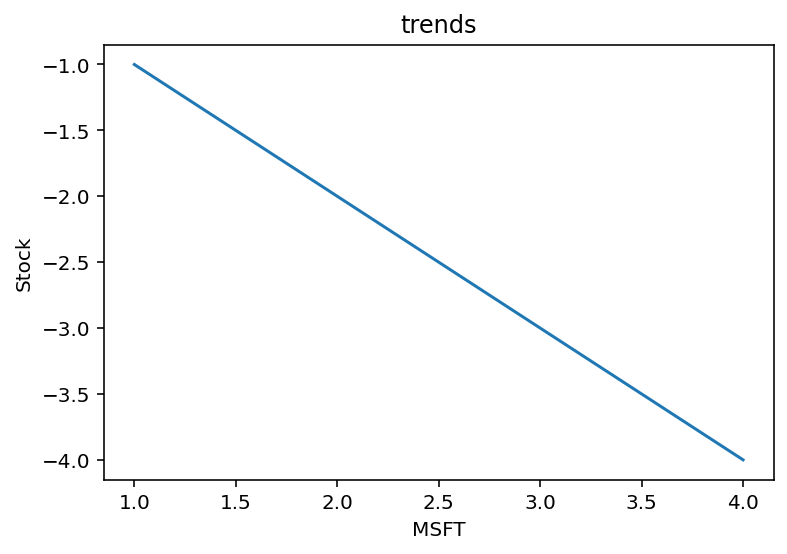

In [51]:
plt.figure()
plt.plot([1, 2, 3, 4], [-1, -2, -3, -4]);
plt.xlabel('MSFT')
plt.ylabel('Stock')
plt.title('trends')
display()

we can add some labels:

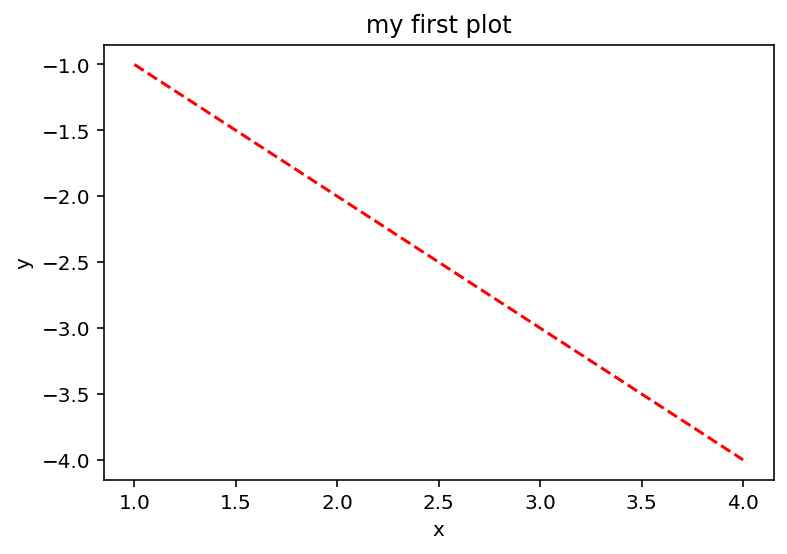

In [52]:
plt.figure()
plt.plot([1, 2, 3, 4], [-1, -2, -3, -4], 'r--');
plt.xlabel('x');
plt.ylabel('y');
plt.title('my first plot');
display()

Plot multiple lines at the same time

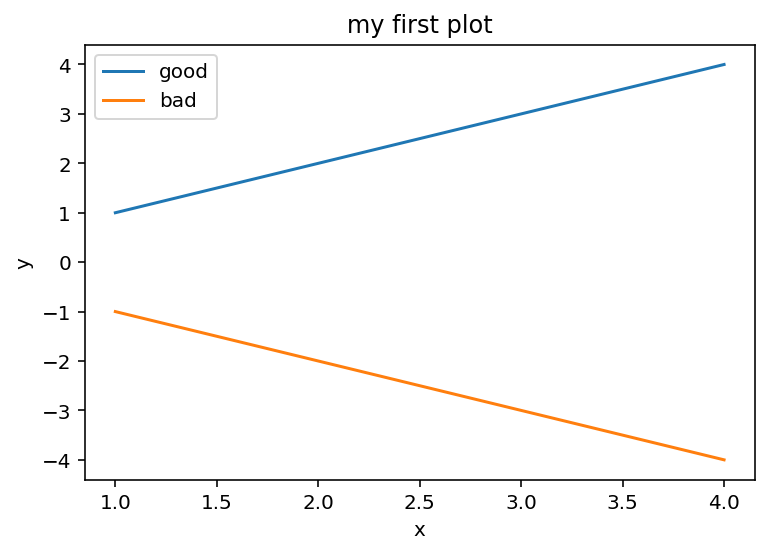

In [53]:
plt.figure()
plt.plot([[1, 1],
          [2, 2],
          [3, 3],
          [4, 4]],
         [[1, -1],
          [2, -2],
          [3, -3],
          [4, -4]]);
plt.xlabel('x');
plt.ylabel('y');
plt.title('my first plot');
plt.legend(['good', 'bad']);
display()

Pandas can plot using the matplotlib library

In [ ]:
# this plots both series
road_ratings[['crack', 'overall']].plot(x='crack', y='overall', kind='scatter');
display();

This is hard to visualize: can you add some jitter to the points to see how many we have in each location?

In [ ]:
road_ratings[['crack', 'overall']].apply(lambda x: x + 0.1*np.random.normal(size=x.shape))\
  .plot(x='crack', y='overall', kind='scatter');
plt.title('Crack vs overall');
display()

In [ ]:
# make your plots look prettier
import seaborn as sns

In [ ]:
road_ratings[['crack', 'overall']].apply(lambda x: x + 0.1*np.random.normal(size=x.shape))\
  .plot(x='crack', y='overall', kind='scatter');
plt.title('Crack vs overall');
display()

In [ ]:
road_ratings[['crack', 'overall']].apply(lambda x: x + 0.1*np.random.normal(size=x.shape))\
  .plot(x='crack', y='overall', kind='scatter');
plt.title('Crack vs overall');
# you can combine with matplotlib
plt.annotate('local min', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
)

display()

Usually, you want to estimate the performance of several models in a prediction

In [ ]:
# fake data
predictions = pd.DataFrame({'actual': np.random.normal(size=100),
                      'model1': 2.1+np.random.normal(size=100),
                      'model2': 5.4+np.random.normal(size=100),
                      'model3': 10+np.random.normal(size=100)
                      })

In [ ]:
predictions

In [ ]:
# Activity: Estimate the MSE of each of the model and the standard deviation of the squared errors.
# Plot them with Pandas
